## <font color='blue'> Plans

<font color='blue'>
    
- Use small_imseq as the input of autocorr.
    
</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor, bpass, wowcolor
from skimage import io, measure
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
from miscLib import label_slope
import matplotlib
import typesetting.main as tm
tm.prl('1-column-2-panel')
import cv2
import pandas as pd
import corrLib

In [4]:
def autocorr_imseq(stack):
    """
    Compute intensity autocorrelation of an image sequence.
    
    Args:
    seq -- image sequence, a DataFrame table containing a set of image names and directories. Return value of corrLib.readseq()
    
    Returns:
    ac_mean -- the autocorrelation
    """
    def autocorr(x):
        x = (x-x.mean()) / x.std()
        result = np.correlate(x, x, mode='full')/len(x)
        return result[len(result)//2:]
    
#     samples = []
#     for num, i in seq.iterrows():
#             X, Y, I = corrLib.divide_windows(io.imread(i.Dir), windowsize=[50, 50], step=300)
#             samples.append(I)
#     stack = np.stack(samples)
    r = stack.reshape((stack.shape[0], stack.shape[1]*stack.shape[2])).transpose()
    ac_list = []
    for x in r:
        ac = autocorr(x)
        ac_list.append(ac)
    ac_stack = np.stack(ac_list)
    ac_mean = ac_stack.mean(axis=0)
    return ac_mean

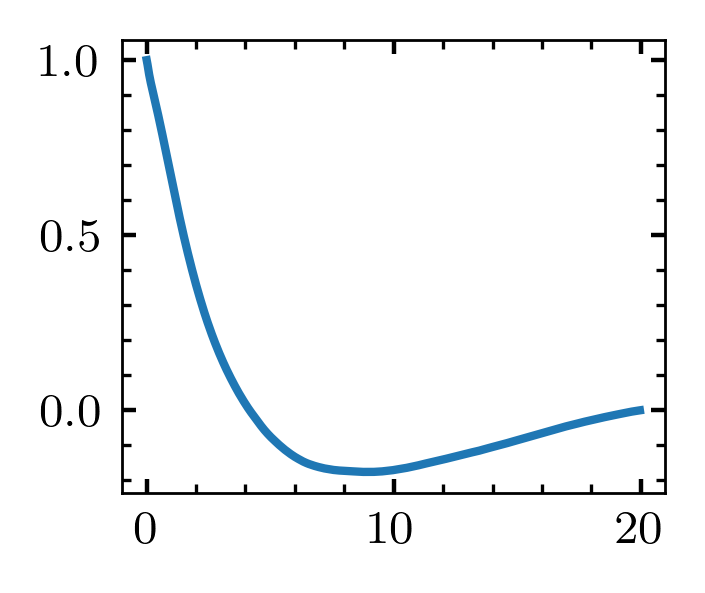

In [21]:
stack = np.load(r'E:\moreData\08032020\small_imseq\06\stack.npy')[3000:3600]
ac = autocorr_imseq(stack)
plt.plot(np.arange(0, 600)/30, ac)

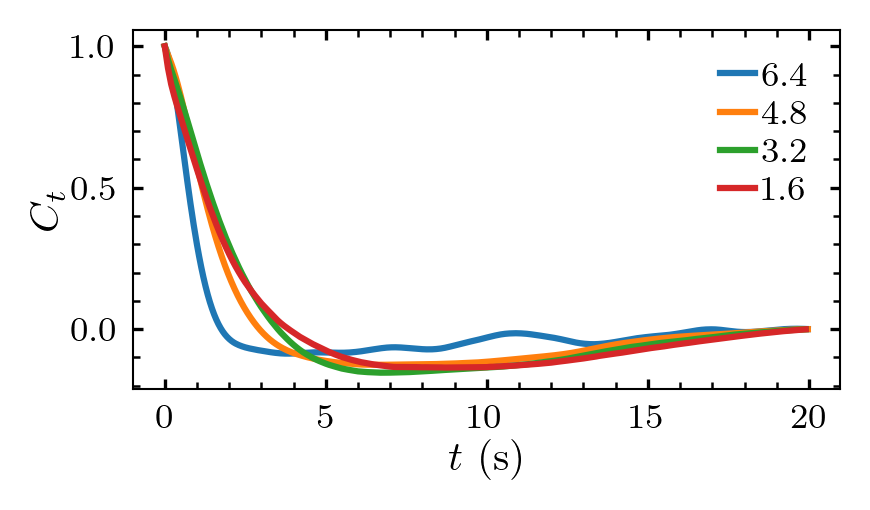

In [29]:
fig, ax = plt.subplots(figsize=(3, 1.8), dpi=300)
num_list = [1, 4, 7, 10]
range_list = [(3000, 3600), (3000, 3600), (1600, 1800), (1600, 1800)]
fps_list = [30, 30, 10, 10]
phi_list = [6.4, 4.8, 3.2, 1.6]
for n, r, fps, phi in zip(num_list, range_list, fps_list, phi_list):
    folder =r'E:\moreData\08032020\small_imseq\{:02d}'.format(n)
    stack = np.load(os.path.join(folder, 'stack.npy'))[r[0]: r[1]]
    ac = autocorr_imseq(stack)
    t = np.arange(0, len(ac)) / fps
    ax.plot(t, ac, label='{:.1f}'.format(phi))
ax.set_xlabel('$t$ (s)')
ax.set_ylabel('$C_t$')
ax.legend()

plt.tight_layout()

fig.savefig(r'C:\Users\liux3141\Google Drive\Research projects\DF\Figures\technical-details\density-autocorrelation\density-autocorrelation.pdf')